In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cst = pd.read_excel( 'export_dataframe.xlsx' )
print ('Prepared NewCustomerList read into a pandas dataframe!')

Prepared NewCustomerList read into a pandas dataframe!


## Objective:

**To select the most valued customer segment by following steps below based on the data available combined with the facts available from Australian Bureau of Statistics:**

1. By Age
2. By Gender
3. By State

4. Further segmentation and budget adjusting probabilities.

Customers will be categorized into "High Valued" based on *Value* and *Wealth Segment*.

In [3]:
df = cst.copy(deep = True)
df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'postcode', 'state', 'country', 'property_valuation', 'Rank', 'Value',
       'age'],
      dtype='object')

## 1. By age:

According to ABS,
- Participation generally decreased with age. People aged 15–17 years reported the highest participation rate in sport and physical recreation (74%), while people aged 65 years and over had the lowest (47%). Male and female participation rates were similar, except in the 25-34 age group where participation rates were higher for males (67%) than females (61%).

- Involvement in organised sport and physical activity generally decreased with age. People aged 15-24 years had the highest rate of involvement in a playing role (43%) and the highest rate of involvement overall (44%). In comparison, people aged 55-64 and 65 years and over had the lowest rate of involvement in a playing role (18% and 17% respectively ) and the lowest involvement overall (19% and 18% respectively).

<Figure size 1080x720 with 0 Axes>

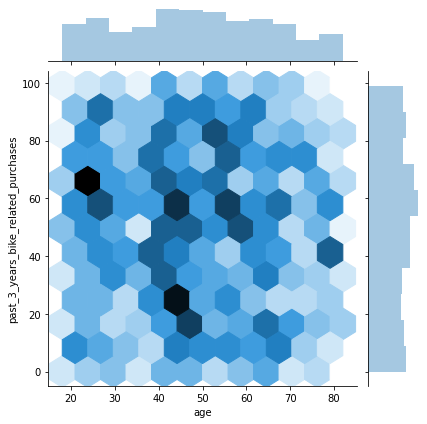

In [4]:
plt.figure(figsize=(15,10))
g = sns.jointplot("age", 'past_3_years_bike_related_purchases', data=df, kind="hex")

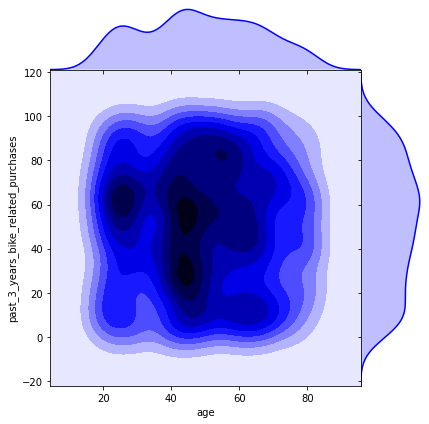

In [5]:
g = sns.jointplot('age', 'past_3_years_bike_related_purchases', data=df, kind="kde", space=0, color="b")

Following the mentioned two points by ABS and above two joint plots, we can observe the reduction in purchases with age above 65. We should not consider customers younger than 15. Even though, customers older than 60 in age might have high bike related purchases, these numbers depicts their total purchases throughout the tenure. Thus, they are less likely to buy more with passing time.

In [6]:
print(df.shape)

(1000, 16)


881.7140937499998

In [7]:
df = df[df['age'].between(15,65)]
df.shape

(815, 16)

## 2. By gender:

According to ABS,
- Male and female participation rates were similar, except in the 25-34 age group where participation rates were higher for males (67%) than females (61%).

In [9]:
temp = df[df['age'].between(25,34)]
temp['gender'].value_counts(normalize=True)

Male      0.571429
Female    0.428571
Name: gender, dtype: float64

Text(0.5, 1.0, 'Purchases by Age, Colored by Gender')

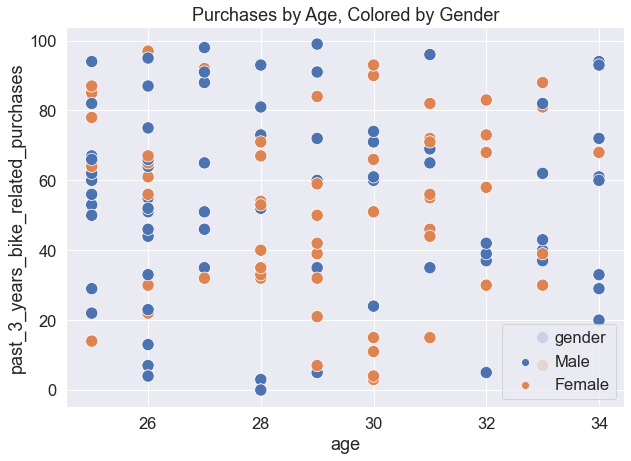

In [10]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.scatterplot('age', 'past_3_years_bike_related_purchases', hue='gender', data=temp, s=150)
plt.title('Purchases by Age, Colored by Gender')

To make the ratio more clear, let's just focus on the group having age between '25-34' and purchases 60 or more. The ratio surely gets inclined towards male.

In [11]:
temp[temp['past_3_years_bike_related_purchases'] >= 60]['gender'].value_counts(normalize=True)

Male      0.606061
Female    0.393939
Name: gender, dtype: float64

Instead of targeting more Male in this age group, we can instead do cost cutting in advertising Female customers. So, **We will remove Female customers having age between '25-34' and purchases lesser than 60.**

In [12]:
temp[temp['past_3_years_bike_related_purchases'] <= 60]['gender'].value_counts(normalize=False)

Male      45
Female    34
Name: gender, dtype: int64

In [14]:
df.drop(df[(df['age'].between(25,34)) & (df['past_3_years_bike_related_purchases'] <= 60) & (df['gender'] == 'Female')]\
        .index, inplace = True)
df.shape

(781, 16)

## 3. By Location:

According to ABS,
- While the differences in participation rates between those born in Australia and those born overseas in main English-speaking countries differ for all states and territories, with the exception of New South Wales and Tasmania, these differences are not statistically significant.

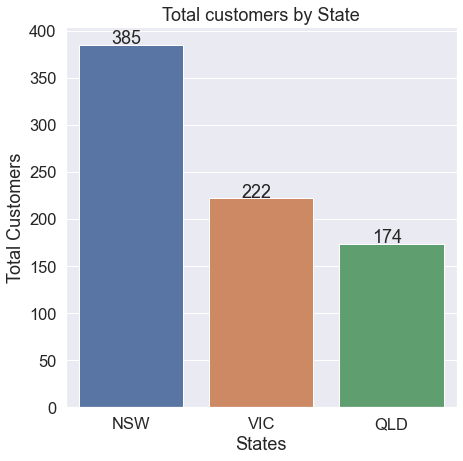

In [16]:
state_counts = df["state"].value_counts().rename_axis('states').reset_index(name='counts')
plt.figure(figsize=(7,7))
sns.set(font_scale=1.5)
g = sns.barplot('states', 'counts', data=state_counts)
g.set(xlabel='States', ylabel='Total Customers')
plt.title('Total customers by State')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1) )

As we do not have the data for the citizenship of the customers, we can focus more on the customers in New South Wales that do not have such differences and is also the location with majority of our customers and remove the rest of the customers.

In [18]:
df = df[df['state']== 'NSW']

## 4. Further segmentation and budget adjusting probabilities:

### 4.1. Industry Category:

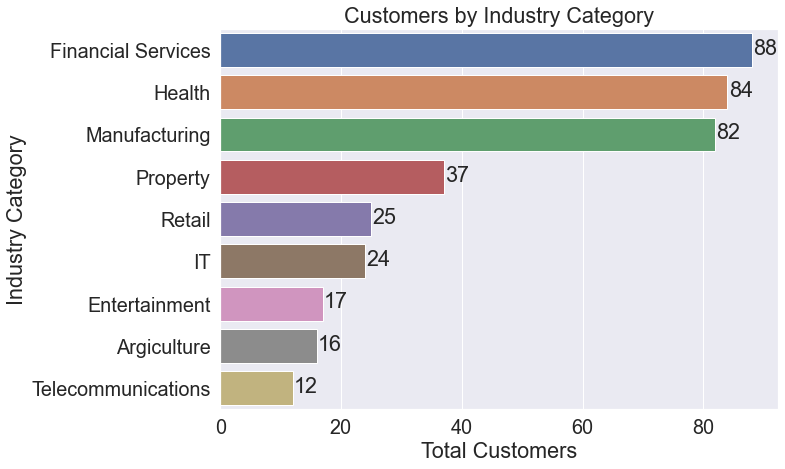

In [20]:
category_counts = df["job_industry_category"].value_counts().rename_axis('cat').reset_index(name='counts')
plt.figure(figsize=(10,7))
sns.set(font_scale=1.8)
g = sns.barplot(y = 'cat', x = 'counts', data=category_counts)
g.set(xlabel='Total Customers', ylabel='Industry Category')
plt.title('Customers by Industry Category')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+0.2, p.get_y() +0.5) )

In [22]:
df = df[df['job_industry_category'].isin(['Financial Serivices', 'Health', 'Manufacturing'])]
df.shape

There are budget constraints if any, then we can segregate **targets from top 3 industry categories such as "Financial Services", "Health" and "Manufacturing".**

### 4.2. Wealth Segment:

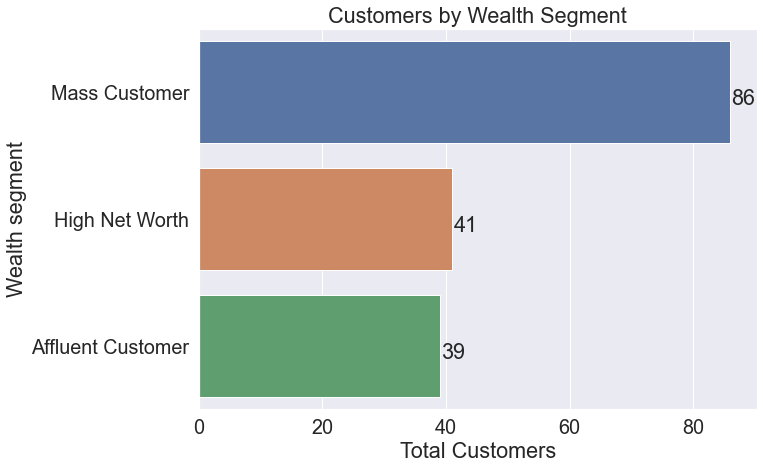

In [24]:
segment_counts = df["wealth_segment"].value_counts().rename_axis('cat').reset_index(name='counts')
plt.figure(figsize=(10,7))
sns.set(font_scale=1.8)
g = sns.barplot(y = 'cat', x = 'counts', data=segment_counts)
g.set(xlabel='Total Customers', ylabel='Wealth segment')
plt.title('Customers by Wealth Segment')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+0.2, p.get_y() +0.5) )

In [30]:
df[['first_name', 'last_name']]

,first_name,last_name
8,Duff,Karlowicz
13,Melba,Spellacy
19,Karly,Willavize
20,Teddie,Burchill
23,Tabbatha,Averill
...,...,...
968,Irving,Babcock
972,Ellwood,Budden
980,Tyne,Anshell
987,Lolly,Prewer


Above are the names of the 166 customers to be targeted for marketing.

**Further Scope:**
- Quarterly or month-wise number of purchases instead of "past_3_year_purchases" can help predicting the purchases of each and every customer for upcoming quarter/month respectively.
- More details about "rank" and "value" can help their inclusion in retrospective analysis
- "Revenue by a customer" can help computing Gain and Lift charts to check the strength of the marketing for the selected customers.